In [50]:
#imports cell
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data_mall = pd.read_csv('Mall_Customers.csv')

In [3]:
data_mall.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
168,169,Female,36,87,27
22,23,Female,46,25,5
93,94,Female,40,60,40
120,121,Male,27,67,56
115,116,Female,19,65,50
146,147,Male,48,77,36
181,182,Female,32,97,86
90,91,Female,68,59,55
158,159,Male,34,78,1
122,123,Female,40,69,58


In [4]:
data_mall.shape

(200, 5)

In [5]:
# change Col Name
replaced_colname = ['cust_id', 'gender', 'age', 'income', 'spending']
colname = data_mall.columns.tolist()
dict_colname = dict(zip(colname, replaced_colname))

data_mall = data_mall.rename(columns=dict_colname)

In [6]:
data_mall.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Simple exploration

In [7]:
# Gender 
data_mall.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [8]:
# Age
data_mall.age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

In [9]:
data_mall.income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

In [10]:
data_mall.spending.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending, dtype: float64

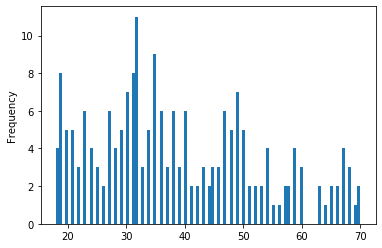

In [11]:
# Histogram
data_mall.age.plot(kind='hist', bins=100)

In [12]:

data_mall.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1st Trials

In [13]:
X = data_mall[['age', 'income', 'spending']]

In [14]:
Km = KMeans(n_clusters=4)

In [15]:
Km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
data_mall['clus1'] = Km.predict(X)


In [17]:
data_mall.sample(4)

,cust_id,gender,age,income,spending,clus1
144,145,Male,25,77,12,2
113,114,Male,19,64,46,1
93,94,Female,40,60,40,1
195,196,Female,35,120,79,0


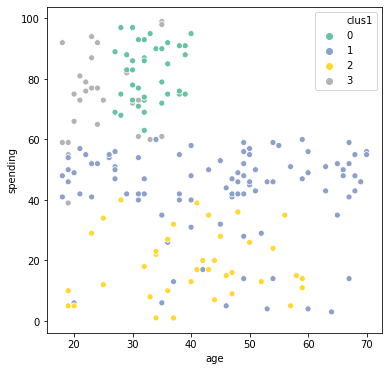

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data_mall, palette='Set2', x='age', y='spending', hue='clus1')

### PCA

In [19]:
pca_model = PCA(n_components=2)
pca_model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
data_mall[['pca_1', 'pca_2']] = pd.DataFrame(pca_model.transform(X))

In [21]:
data_mall.sample(5)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2
163,164,Female,31,81,93,0,47.155920,-9.068378
68,69,Male,19,48,59,3,3.274576,-17.803298
12,13,Female,58,20,15,1,-55.161213,-10.077978
43,44,Female,31,39,61,3,-2.718891,-24.654924
11,12,Female,35,19,99,3,14.620259,-62.107294


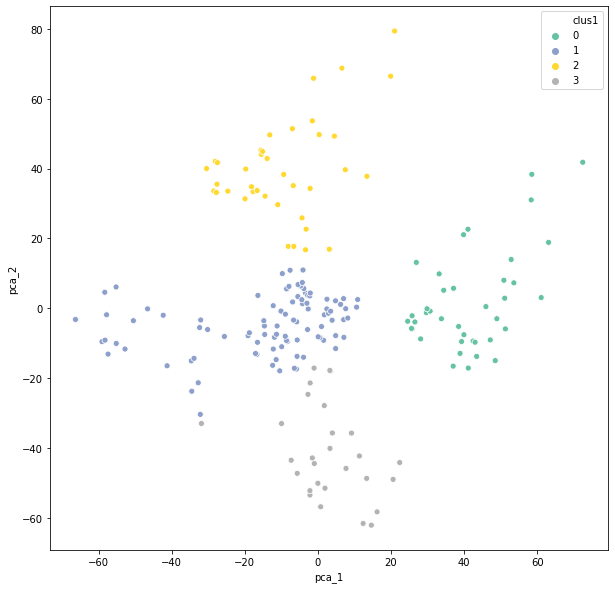

In [22]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='pca_1', y='pca_2', hue='clus1')

In [25]:
K_list=list(np.arange(2,20))
K_list

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [31]:
data_eval = []
for k in K_list:
    km = KMeans(n_clusters=k)
    km.fit(X)
    class_result = km.predict(X)
    ss = silhouette_score(X, class_result)
    data_eval.append([k, ss])
data_eval

[[2, 0.293166070535953],
 [3, 0.3839349967742105],
 [4, 0.40546302077733304],
 [5, 0.44428597560893024],
 [6, 0.4523566166018854],
 [7, 0.4433953592926531],
 [8, 0.42786362446871096],
 [9, 0.411203806978027],
 [10, 0.38462627152724066],
 [11, 0.37655575426110943],
 [12, 0.37085909703187114],
 [13, 0.3393996611852412],
 [14, 0.34828373853584244],
 [15, 0.3547821270792796],
 [16, 0.3484718197356705],
 [17, 0.3343152059636452],
 [18, 0.3566217016118465],
 [19, 0.3333926968540203]]

In [35]:
df_data_eval = pd.DataFrame(data_eval,columns=['k','silhouette'])
df_data_eval.index = df_data_eval['k']

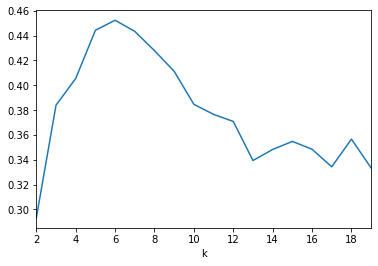

In [36]:
df_data_eval.silhouette.plot()

In [41]:
# Retrain using K = 6
km_1 = KMeans(n_clusters=6)
km_1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
data_mall['clus_2'] = km_1.predict(X)

In [43]:
data_mall.sample(5)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2,clus_2
91,92,Male,18,59,41,1,-4.209336,1.288314,4
33,34,Male,18,33,92,3,20.571819,-48.999047,3
170,171,Male,40,87,13,2,-13.892722,42.873649,2
128,129,Male,59,71,11,2,-28.473481,33.575804,2
23,24,Male,31,25,73,3,-1.527907,-42.859147,3


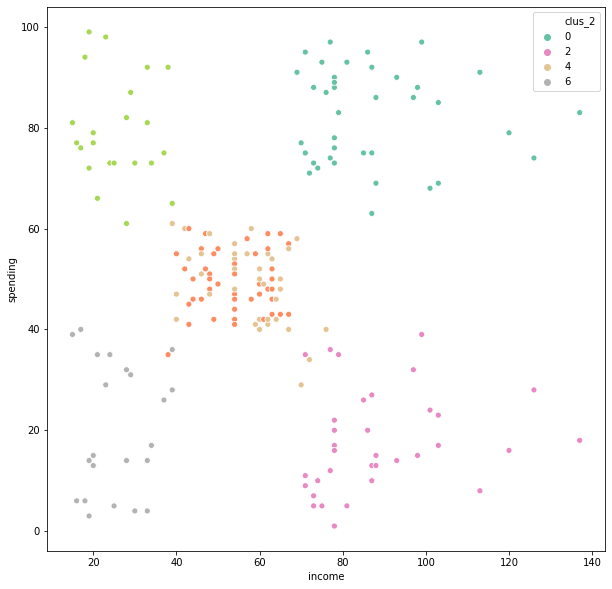

In [45]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='income', y='spending', hue='clus_2')

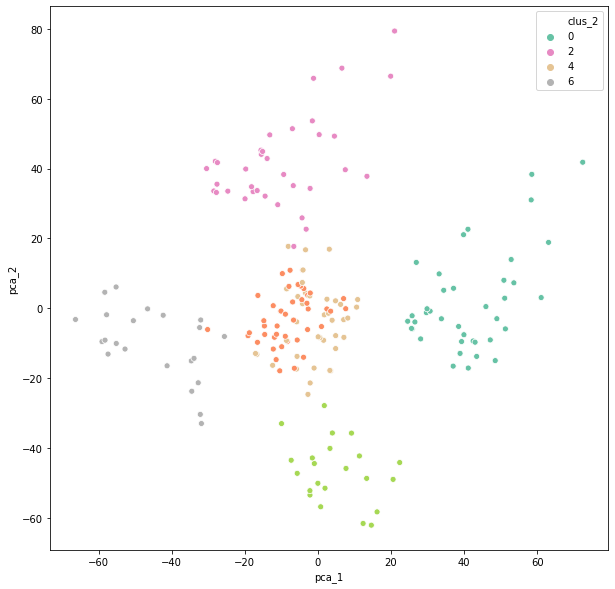

In [46]:
# 6 Clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='pca_1', y='pca_2', hue='clus_2')

In [47]:
data_intp = data_mall.groupby('clus_2')[['age', 'income','spending']].mean()
data_intp

,age,income,spending
clus_2,,,
0,32.692308,86.538462,82.128205
1,56.340909,53.704545,49.386364
2,41.685714,88.228571,17.285714
3,25.272727,25.727273,79.363636
4,27.000000,56.657895,49.131579
5,44.318182,25.772727,20.272727


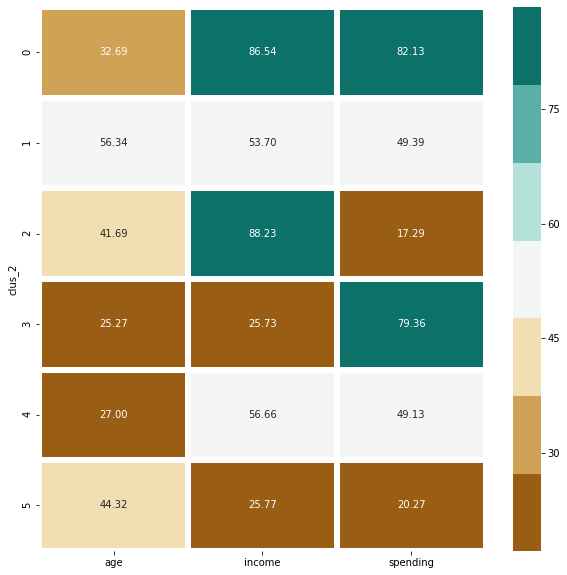

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(data_intp, annot=True, linewidths=5, fmt='.2f', cmap=sns.color_palette('BrBG',7))

In [51]:
# Standard scalling
scale_mod = StandardScaler()

In [52]:
scale_mod.fit(X)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
data_mall[['age_s', 'income_s', 'spending_s']] = pd.DataFrame(scale_mod.transform(X))

In [55]:
data_mall.head()

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2,clus_2,age_s,income_s,spending_s
0,1,Male,19,15,39,3,-31.870508,-33.001425,5,-1.424569,-1.738999,-0.434801
1,2,Male,21,15,81,3,0.763397,-56.843865,3,-1.281035,-1.738999,1.195704
2,3,Female,20,16,6,1,-57.408726,-13.122936,5,-1.352802,-1.700830,-1.715913
3,4,Female,23,16,77,3,-2.169896,-53.477905,3,-1.137502,-1.700830,1.040418
4,5,Female,31,17,40,1,-32.174920,-30.387005,5,-0.563369,-1.662660,-0.395980


In [56]:
data_mall[['age_s', 'income_s', 'spending_s']].std()

age_s         1.002509
income_s      1.002509
spending_s    1.002509
dtype: float64

In [57]:
data_intp2 = data_mall.groupby('clus_2')[['age_s', 'income_s','spending_s']].mean()
data_intp2

,age_s,income_s,spending_s
clus_2,,,
0,-0.441917,0.991583,1.239503
1,1.255265,-0.261669,-0.031587
2,0.203510,1.056094,-1.277784
3,-0.974396,-1.329545,1.132178
4,-0.850435,-0.148941,-0.041478
5,0.392433,-1.327810,-1.161823


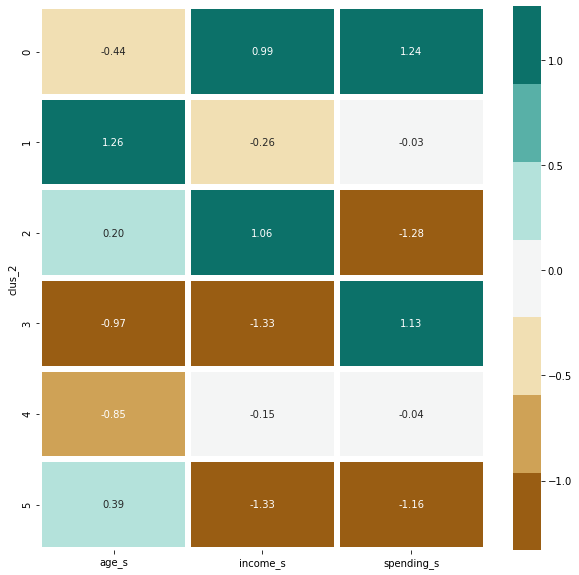

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(data_intp2, annot=True, linewidths=5, fmt='.2f', cmap=sns.color_palette('BrBG',7))